# TrES-5 b Occultation Tests

**NOTE:** Some 'problem' data points that are removed:


|  i  | epoch |  y  | data point from csv |
| --- |  ---  | --- |         ---         |
| 14  | 974   | -4884.850160682981 | (-1655,2456596.38431,0.00065,0.00065,56.16,56.16,2022ApJS..259...62I; 2018MNRAS.480..291S)|
|55| 1588| -776.1948236497119| (-1041,2457506.531309184,0.00048,0.00048,41.47,41.47,TRESCA)|
|195| 3165| -1018.7907784507843| (537,2459845.513720722,0.00053,0.00053,45.79,45.79,TRESCA)|

## Imports

### Importing packages and libraries

In [1]:
# Standard Python Packages
import datetime as dt
# Numerical Packages
import numpy as np
import pandas as pd
# Susie
from susie.timing_data import TimingData
from susie.ephemeris import Ephemeris
# Astropy/plan
from astropy.time import Time
import astropy.coordinates as coord
import astropy.units as u
from astroplan import FixedTarget, Observer, EclipsingSystem
from astroplan import (is_event_observable, AtNightConstraint, AltitudeConstraint, LocalTimeConstraint)
# Helper functions
from helpers import find_oc_outliers, convert_to_tdb, get_epochs_for_new_data, get_n_random_observations

### Importing Data

In [2]:
# url = "all_lit_times_TrES-5b.csv"
url = "data/combined_times_TrES-5b.csv"

# Read the CSV file directly from the URL
data = pd.read_csv(url)
epochs = np.array(data["Epoch"].astype('int'))
mid_times = np.array(data["Midtime"])
mid_time_errs = np.array(data["Midtime_err_minus_days"])
tra_or_occ = np.array(['tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra', 'tra'])

## Basic Susie Usage & Plots

### Creating timing and ephemeris objects

In [3]:
# Create new transit times object with above data
timing_obj1 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, time_scale='tdb')
ephemeris_obj1 = Ephemeris(timing_obj1)

In [4]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.get_model_ephemeris('linear')

In [5]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
quadratic_model_data = ephemeris_obj1.get_model_ephemeris('quadratic')

### Plotting some things

O-C Plot

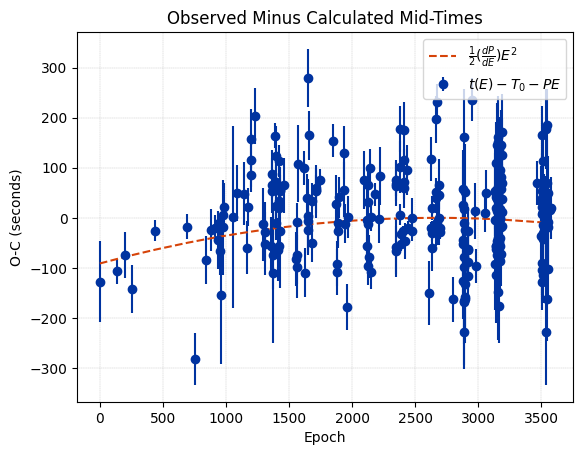

In [6]:
ephemeris_obj1.plot_oc_plot()

**NOTE:** Finding O-C outliers (already processed, 3 data points removed, see top of notebook)

In [7]:
find_oc_outliers(ephemeris_obj1, -250)

['index: 6, epoch: 754, y value: -281.1606324168679, mid-time: 2456270.3438575845']

Model Uncertainties

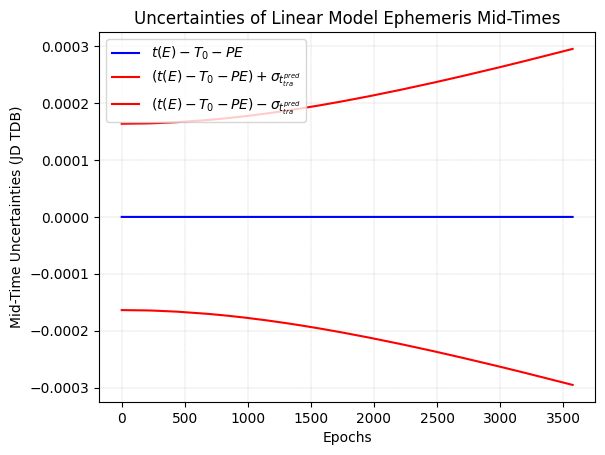

In [8]:
ephemeris_obj1.plot_timing_uncertainties(linear_model_data, save_plot=False)

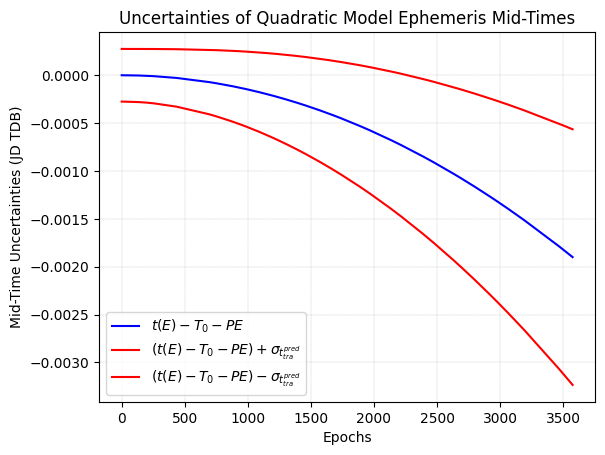

In [9]:
ephemeris_obj1.plot_timing_uncertainties(quadratic_model_data, save_plot=False)

Running Delta BIC Plot

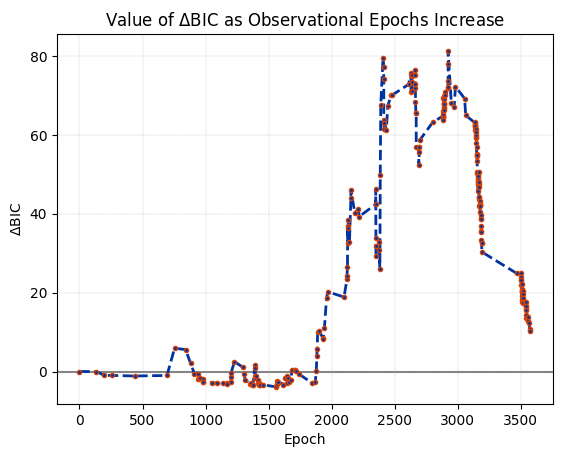

In [10]:
ephemeris_obj1.plot_running_delta_bic()

## Astroplan (Getting the occultation times)

### Creating the astroplan EclipsingSystem object

In [11]:
# From Boise State (can change to any observatory)
boiseState = Observer(longitude=-116.208710*u.deg, latitude=43.602*u.deg,
                  elevation=821*u.m, name="BoiseState", timezone="US/Mountain")
# TrES-5 as target
target = FixedTarget.from_name("TrES-5")

In [12]:
# Using the last observed transit mid-time
primary_eclipse_time = Time(timing_obj1.mid_times[-1], format='jd')
# Orbital period included in Marvin's metadata from CSV files
orbital_period = 1.482246865 * u.day
# Transit duration pulled from NASA Exoplanet Archive
eclipse_duration = 1.595 * u.hour

tres_5b = EclipsingSystem(primary_eclipse_time=primary_eclipse_time,
                           orbital_period=orbital_period, duration=eclipse_duration,
                           name="TrES-5 b")

### Finding Past Transits

Testing with the next 10 transits from January 1st, 2017 (just for testing transit time generation, not occultations)

In [13]:
obs_time = Time('2017-01-01 12:00') # In the past! January 1st, 2017
midtransit_times = tres_5b.next_primary_eclipse_time(obs_time, n_eclipses=10)

**Test:** For the next 10 transits starting at 2017-01-01, these should be the tansits that are observable with time constraints of 19:00 to 6:00 (7pm-6am) local time
| observable | not observable |
| --- | --- |
|(1) '2017-01-02 01:22:41.677'|(2) '2017-01-03 12:57:07.806'|
|(3) '2017-01-05 00:31:33.935'|(4) '2017-01-06 12:06:00.064'|
|(5) '2017-01-07 23:40:26.193'|(6) '2017-01-09 11:14:52.322'|
|(7) '2017-01-10 22:49:18.452'|(8) '2017-01-12 10:23:44.581'|
|(9) '2017-01-13 21:58:10.710'|(10) '2017-01-15 09:32:36.839'|

In [14]:
min_local_time = dt.time(19, 0)  # 19:00 local time at APO (7pm)
max_local_time = dt.time(6, 0)  # 06:00 local time at APO (6am)
constraints = [LocalTimeConstraint(min=min_local_time, max=max_local_time)]

is_transit_obs = is_event_observable(constraints, boiseState, target, times=midtransit_times)[0]
observable_events = [midtime for midtime, is_observable in zip(midtransit_times, is_transit_obs) if is_observable]
observable_events

[<Time object: scale='utc' format='iso' value=2017-01-02 01:22:41.677>,
 <Time object: scale='utc' format='iso' value=2017-01-05 00:31:33.935>,
 <Time object: scale='utc' format='iso' value=2017-01-07 23:40:26.193>,
 <Time object: scale='utc' format='iso' value=2017-01-10 22:49:18.452>,
 <Time object: scale='utc' format='iso' value=2017-01-13 21:58:10.710>]

### Finding Past Occultations

In [15]:
obs_time = Time('2017-01-01 12:00') # In the past! January 1st, 2017
midocc_times = tres_5b.next_secondary_eclipse_time(obs_time, n_eclipses=10)

In [16]:
mid_occultation_times_iso = midocc_times.copy()
midocc_times.format = "jd"
mid_occultation_times_jd = midocc_times

In [17]:
print(f"Next 10 occultations from Jan 1st, 2017 \n----------------------------\nISO UTC: {mid_occultation_times_iso} \n\nJD: {mid_occultation_times_jd}")

Next 10 occultations from Jan 1st, 2017 
----------------------------
ISO UTC: ['2017-01-02 19:09:54.741' '2017-01-04 06:44:20.870'
 '2017-01-05 18:18:47.000' '2017-01-07 05:53:13.129'
 '2017-01-08 17:27:39.258' '2017-01-10 05:02:05.387'
 '2017-01-11 16:36:31.516' '2017-01-13 04:10:57.645'
 '2017-01-14 15:45:23.774' '2017-01-16 03:19:49.904'] 

JD: [2457756.29855025 2457757.78079711 2457759.26304398 2457760.74529084
 2457762.22753771 2457763.70978457 2457765.19203144 2457766.6742783
 2457768.15652517 2457769.63877203]


### Correcting for barycentric light travel time

In [18]:
# Create the SkyCoord and EarthLocation objects
tres_5b_skycoord = coord.SkyCoord.from_name("TrES-3")
boise_state_earthlocation = coord.EarthLocation.from_geodetic(-116.20871*u.deg, 43.602*u.deg, 821*u.m)
mid_occultation_times_bjd = convert_to_tdb(tres_5b_skycoord, boise_state_earthlocation, mid_occultation_times_jd)
mid_occultation_times_bjd

/Users/maliabarker/Desktop/Research/tres_3b/helpers.py:31: FutureWarning: Setting the location attribute post initialization will be disallowed in a future version of Astropy. Instead you should set the location when creating the Time object. In the future, this will raise an AttributeError.
  time_obj.location = location_obj


<Time object: scale='tdb' format='jd' value=[2457756.29668347 2457757.7789505  2457759.26121989 2457760.74349051
 2457762.22576344 2457763.70803756 2457765.19031394 2457766.6725915
 2457768.15487124 2457769.63715217]>

### Adding one occultation into data

In [19]:
new_occ_time = mid_occultation_times_bjd.value[0]
new_occ_epoch = get_epochs_for_new_data(np.array([new_occ_time]), ephemeris_obj1.timing_data.mid_times[0], 1.482246865, "occ")

In [20]:
new_epochs = np.append(epochs, new_occ_epoch)
new_mid_times = np.append(mid_times, new_occ_time)
new_mid_time_errs = np.append(mid_time_errs, 0.0001)
new_tra_or_occ = np.append(tra_or_occ, "occ")

In [21]:
timing_obj2 = TimingData('jd', new_epochs, new_mid_times, mid_time_uncertainties=new_mid_time_errs, tra_or_occ=new_tra_or_occ, time_scale='tdb')
ephemeris_obj2 = Ephemeris(timing_obj2)

### Comparing Running Delta BIC Plots with new Occultation Point

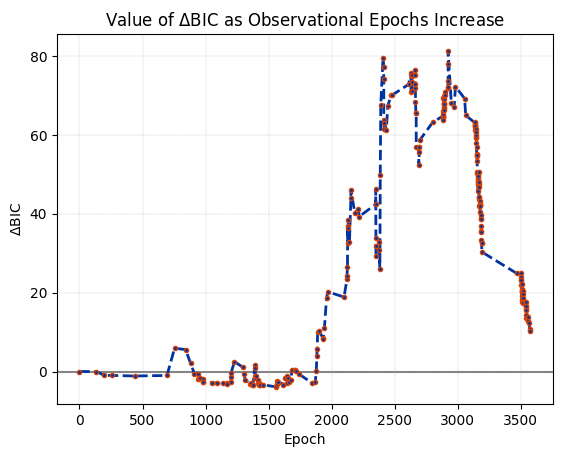

In [22]:
ephemeris_obj1.plot_running_delta_bic()

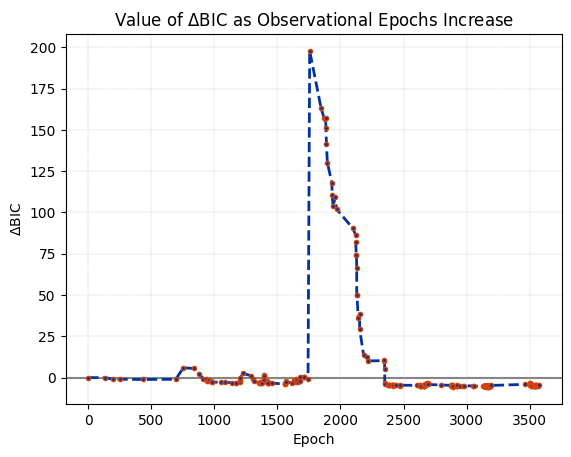

In [23]:
ephemeris_obj2.plot_running_delta_bic()

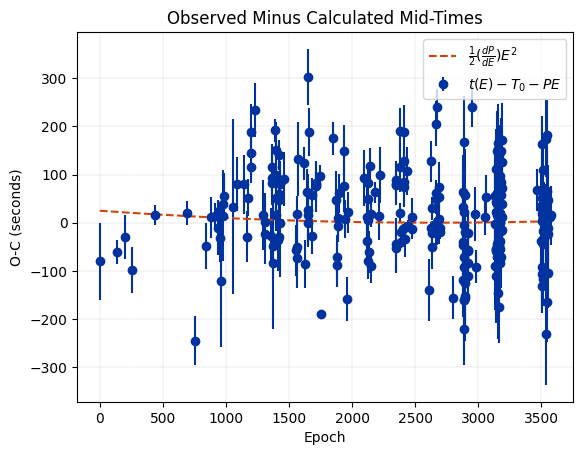

In [24]:
ephemeris_obj2.plot_oc_plot()

## Testing with 10 Observed Occultations over the years of 2015 - 2023

Generating 10 random occultations between Jan 1st, 2015 and Jan 1st, 2024

In [25]:
ten_new_occs = get_n_random_observations(10, "occ", "2015-1-1 0:00", "2024-1-1 0:00", tres_5b, tres_5b_skycoord, boise_state_earthlocation, ephemeris_obj1.timing_data.mid_times[0], 1.482246865)

In [26]:
# Insert new data into the existing data arrays and create new timing and ephemeris object
new_epochs = np.append(epochs, ten_new_occs["new_epochs"])
new_mid_times = np.append(mid_times, ten_new_occs["new_mid_times"].value)
new_mid_time_errs = np.append(mid_time_errs, ten_new_occs["new_mid_time_errs"])
new_tra_or_occ = np.append(tra_or_occ, ten_new_occs["new_tra_or_occ"])

In [27]:
ten_new_occs["new_mid_times"].format = "iso"
print("Occultation Mid-Times Being Added:")
print(ten_new_occs["new_mid_times"].value)

Occultation Mid-Times Being Added:
['2016-03-18 06:40:34.431' '2022-08-17 17:03:03.595'
 '2021-11-16 11:52:29.705' '2017-04-19 12:29:16.039'
 '2019-06-18 13:23:22.869' '2019-01-18 08:50:57.697'
 '2020-11-12 09:58:03.550' '2022-02-06 00:26:26.807'
 '2015-11-05 21:01:22.808' '2015-04-04 22:48:15.084']


Creating the Timing Object and Ephemeris Objects 

In [28]:
timing_obj3 = TimingData('jd', new_epochs, new_mid_times, mid_time_uncertainties=new_mid_time_errs, tra_or_occ=new_tra_or_occ, time_scale='tdb')
ephemeris_obj3 = Ephemeris(timing_obj3)

Generate Plots

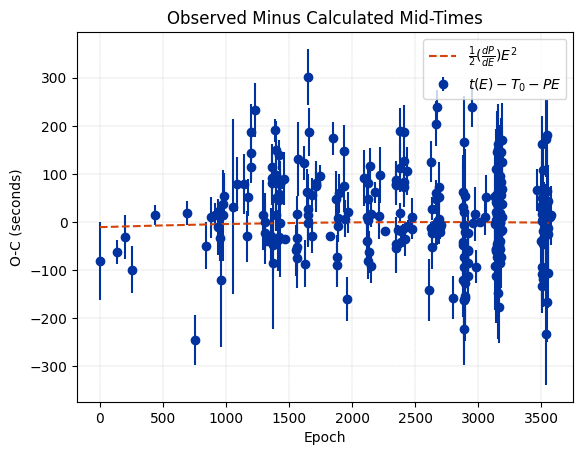

In [29]:
ephemeris_obj3.plot_oc_plot()

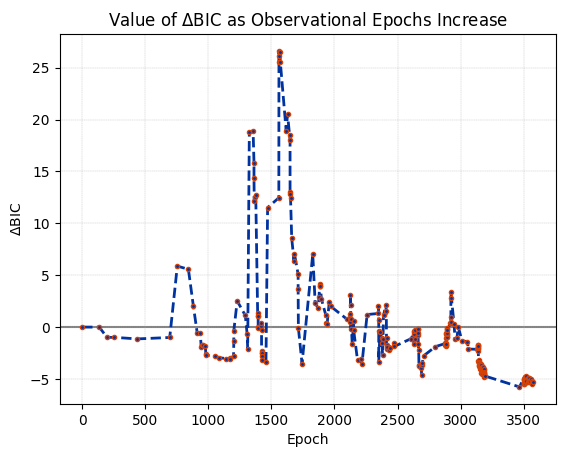

In [30]:
ephemeris_obj3.plot_running_delta_bic()